In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("data/enhanced_anxiety_dataset.csv", sep=",")

In [3]:
df_pd = pd.DataFrame(data)

In [4]:
df_pd

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0


In [5]:
df_pd.groupby("Gender")['Anxiety Level (1-10)'].agg("count")

Gender
Female    3730
Male      3657
Other     3613
Name: Anxiety Level (1-10), dtype: int64

In [6]:
ruta = "data/enhanced_anxiety_dataset.csv"
ruta_parquet = "data/enhanced_anxiety_dataset.parquet"

In [7]:
df_pd = pd.read_csv(ruta)
df_pd.to_parquet(ruta_parquet)

In [8]:
!pip install polars


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: C:\Users\usuario\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [9]:
import polars as pl

In [10]:
df = pl.read_parquet(ruta_parquet)

In [11]:
import matplotlib.pyplot as plt

In [12]:
df.head()

Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
i64,str,str,f64,f64,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,str,i64,f64
29,"""Female""","""Artist""",6.0,2.7,181,10,"""Yes""","""No""",10,114,14,4,"""No""","""Yes""",3,"""Yes""",7,5.0
46,"""Other""","""Nurse""",6.2,5.7,200,8,"""Yes""","""Yes""",1,62,23,2,"""Yes""","""No""",2,"""No""",8,3.0
64,"""Male""","""Other""",5.0,3.7,117,4,"""No""","""Yes""",1,91,28,3,"""No""","""No""",1,"""Yes""",1,1.0
20,"""Female""","""Scientist""",5.8,2.8,360,6,"""Yes""","""No""",4,86,17,3,"""No""","""No""",0,"""No""",1,2.0
49,"""Female""","""Other""",8.2,2.3,247,4,"""Yes""","""No""",1,98,19,4,"""Yes""","""Yes""",1,"""No""",3,1.0


In [32]:
# Agrupar y contar correctamente en Polars
conteo = (
    df.group_by('Gender')
    .agg([
        pl.col('Gender').count().alias('Count'),
        pl.col("Age").min(),
        pl.col("Anxiety Level (1-10)").min().alias('Anxiety')

    ])
    .sort('Count', descending=True)
)

In [33]:
conteo

Gender,Count,Age,Anxiety
str,u32,i64,f64
"""Female""",3730,18,1.0
"""Male""",3657,17,1.0
"""Other""",3613,16,1.0


In [46]:
vector = df_pd.groupby("Gender")['Gender'].agg("count")

In [68]:
vector 

Gender
Female    3730
Male      3657
Other     3613
Name: Gender, dtype: int64

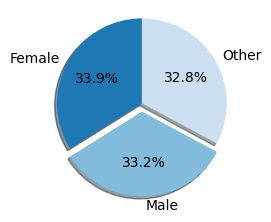

In [82]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
genero = conteo['Gender'].to_list()
cantidad = conteo['Count'].to_list()

labels = genero
sizes = cantidad
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()